In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [2]:
#%matplotlib notebook
%matplotlib inline

In [3]:
# with open('mnist_test.csv', 'r') as f:
#     reader = csv.reader(f)
#     mnist_data = list(reader)

In [4]:
data_mnist = np.loadtxt('mnist_test.csv', delimiter=',')

In [5]:
data_mnist.shape

(10000, 785)

In [6]:
labels = data_mnist[:, 0]
pixels = data_mnist[:, 1:]
labels[:6]

array([7., 2., 1., 0., 4., 1.])

In [7]:
data_t = [(pixels[i], int(labels[i])) for i in range(len(labels))]
data_t[0][1]

7

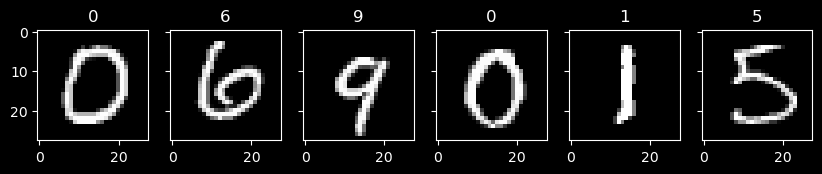

In [8]:
fig, axs = plt.subplots(1, 6, figsize=(10, 5),sharey=True)

for ax, data, l in zip(axs, pixels[10:16], labels[10:16]):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(str(int(l)))
    
plt.show()

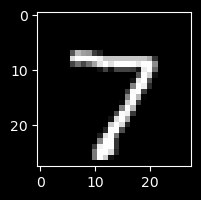

In [9]:
image1 = np.array(pixels[0],dtype='uint8').reshape(28,28)

plt.figure(figsize=(2,2))
plt.imshow(image1,cmap=cm.gray)

In [10]:
x = np.arange(0, 28, 1)
y = np.arange(0, 28, 1)
X, Y = np.meshgrid(x, y)
Z = image1[X, Y]

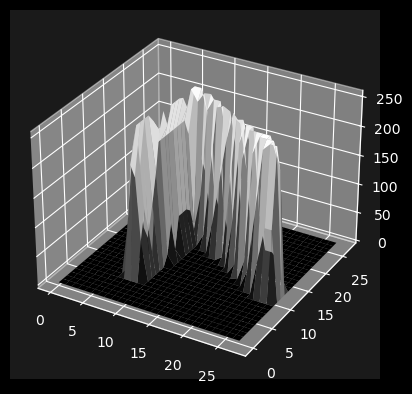

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_facecolor('0.1')
ax.plot_surface(X, Y, Z,cmap=cm.gray)
plt.show()

In [12]:
%matplotlib inline

In [109]:
from sklearn.manifold import TSNE

X, y = pixels, labels

In [110]:
m = 5000
idx = np.random.permutation(len(X))[:m]

In [111]:
X_tsne = X[idx]
y_tsne = y[idx]

In [112]:
y_tsne = y_tsne.astype(int)
y_tsne.dtype

dtype('int32')

In [113]:
tsne = TSNE(n_components = 2)
X_2d = tsne.fit_transform(X_tsne)

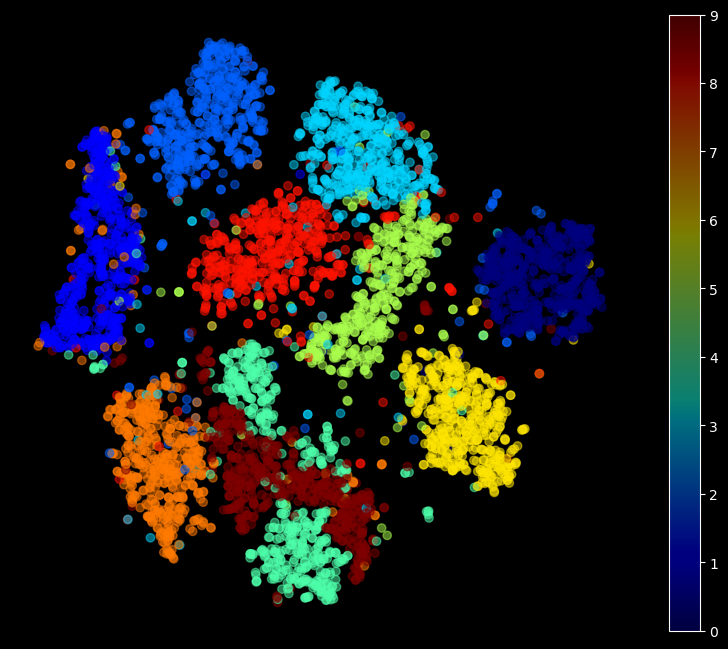

In [124]:
plt.figure(figsize=(10,8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c = y_tsne, cmap = 'jet', alpha=.5)
plt.axis('off')
plt.colorbar()
plt.show()

In [115]:
tsne = TSNE(n_components = 3)
X_3d = tsne.fit_transform(X_tsne)

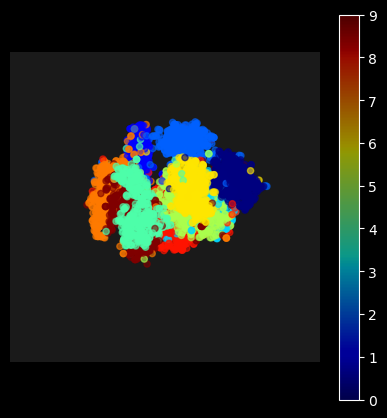

In [116]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.set_facecolor('0.1')
ax.axis('off')
p = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_tsne, cmap='jet', alpha=.6)
fig.colorbar(p);

In [117]:
%matplotlib inline

In [118]:
import pandas as pd
from pandas.plotting import parallel_coordinates

In [119]:
parallel_coordinates?

In [120]:
df = pd.DataFrame(X_3d)

In [121]:
df['y'] = y_tsne

In [122]:
df

,0,1,2,y
0,-8.629863,15.610312,8.008527,2
1,-4.387570,8.906703,-13.331242,8
2,2.999934,15.815351,-4.801090,3
3,21.138988,3.802529,11.401052,0
4,-6.753320,-6.635463,5.964174,9
...,...,...,...,...
4995,22.728340,4.824993,-0.261024,0
4996,12.653539,9.550416,3.349841,0
4997,-5.249670,-9.323603,4.488062,9
4998,-15.607252,4.031472,2.479906,1


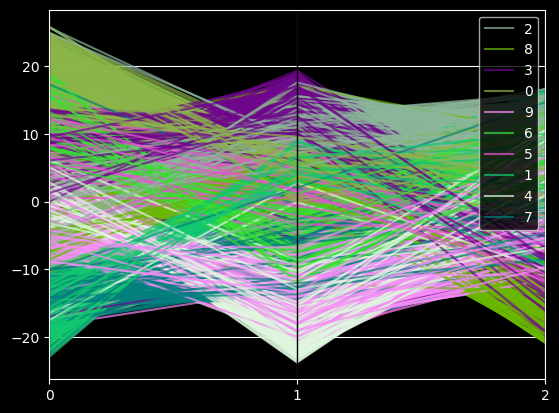

In [125]:
parallel_coordinates(df, 'y', alpha=.7)
plt.show()